In [196]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [197]:
data = pd.read_csv('student_lifestyle_dataset.csv')
data.head(5)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [199]:
# Mengubah tipe data dari Float ke Int
data["Study_Hours_Per_Day"] = data["Study_Hours_Per_Day"].astype(int)
data["Extracurricular_Hours_Per_Day"] = data["Extracurricular_Hours_Per_Day"].astype(int)
data["Sleep_Hours_Per_Day"] = data["Sleep_Hours_Per_Day"].astype(int)
data["Social_Hours_Per_Day"] = data["Social_Hours_Per_Day"].astype(int)
data["Physical_Activity_Hours_Per_Day"] = data["Physical_Activity_Hours_Per_Day"].astype(int)
data["GPA"] = data["GPA"].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Student_ID                       2000 non-null   int64 
 1   Study_Hours_Per_Day              2000 non-null   int64 
 2   Extracurricular_Hours_Per_Day    2000 non-null   int64 
 3   Sleep_Hours_Per_Day              2000 non-null   int64 
 4   Social_Hours_Per_Day             2000 non-null   int64 
 5   Physical_Activity_Hours_Per_Day  2000 non-null   int64 
 6   GPA                              2000 non-null   int64 
 7   Stress_Level                     2000 non-null   object
dtypes: int64(7), object(1)
memory usage: 125.1+ KB


In [200]:
data.head(5)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6,3,8,2,1,2,Moderate
1,2,5,3,8,4,3,2,Low
2,3,5,3,9,1,4,2,Low
3,4,6,2,7,1,6,2,Moderate
4,5,8,0,6,2,6,3,High


In [201]:
data.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [202]:
# Standarisasi Data
data_processed = data.drop(columns=["Student_ID"], errors="ignore")  # Hapus kolom ID jika ada
label_encoder = LabelEncoder()
data_processed["Stress_Level"] = label_encoder.fit_transform(data_processed["Stress_Level"])

# Split Dataset: Fitur (X) dan Target (y)
X = data_processed.drop(columns=["Stress_Level"])
y = data_processed["Stress_Level"]

# Split Data menjadi Train dan Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
# Inialisasi model
models = {
    "Linear Regression" : LinearRegression(),
    "Random Forest" : RandomForestRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "SVR" : SVR(),
    "KNN" : KNeighborsRegressor()
}

# Evaluasi Model
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test).round()
    # Evaluasi
    accuray = accuracy_score(y_test, y_pred)
    results[name] = {"Accuray Score" : accuray}

results

{'Linear Regression': {'Accuray Score': 0.38},
 'Random Forest': {'Accuray Score': 0.985},
 'Decision Tree': {'Accuray Score': 0.98},
 'SVR': {'Accuray Score': 0.73},
 'KNN': {'Accuray Score': 0.95}}

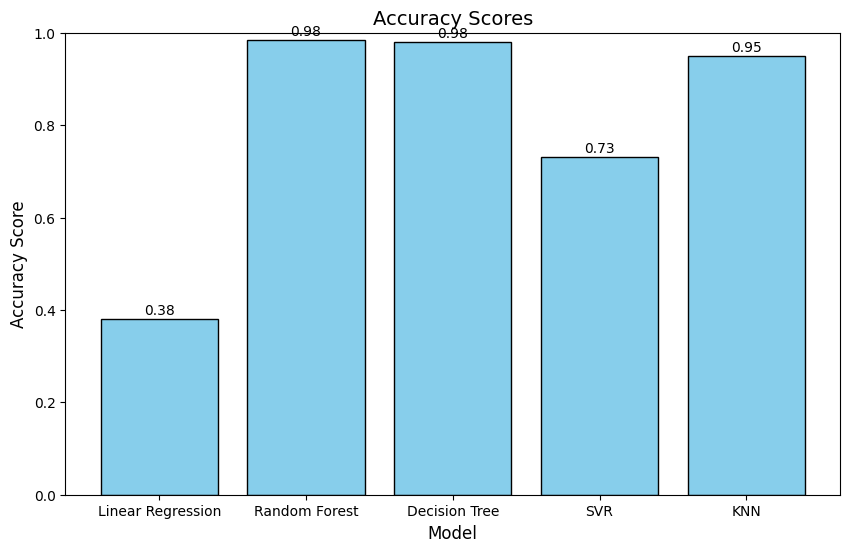

In [204]:
model_names = list(results.keys())
accuracy_scores = [result["Accuray Score"] for result in results.values()]

# Plot grafik 
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue', edgecolor='black')

# Label dan judul
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Scores', fontsize=14)

# Menambahkan nilai akurasi di atas batang
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1)

# Tampilkan grafik
plt.show()


In [205]:
# Simpan model ke file
joblib.dump((models['Random Forest'], label_encoder), 'RandomForest.pkl')

['RandomForest.pkl']